<a href="https://colab.research.google.com/github/ErikLens/CrScoringMay2023/blob/main/CrScoring_team5_Ed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# Загрузка необходимых для анализа библиотек

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Подключение к базе Postgre

!mkdir -p ~/.postgresql && \
wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" \
    --output-document ~/.postgresql/root.crt && \
chmod 0600 ~/.postgresql/root.crt

--2023-05-23 05:17:08--  https://storage.yandexcloud.net/cloud-certs/CA.pem
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3579 (3.5K) [application/x-x509-ca-cert]
Saving to: ‘/root/.postgresql/root.crt’

/root/.postgresql/r 100%[===================>]   3.50K  --.-KB/s    in 0s      

2023-05-23 05:17:09 (523 MB/s) - ‘/root/.postgresql/root.crt’ saved [3579/3579]



In [4]:
# Обновление версии Python вместе с PIP

!sudo apt update && sudo apt install --yes python3 python3-pip && \
!pip3 install psycopg2-binary

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,721 kB]
Get:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2,408 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:

In [5]:
# Импорт библиотеки, позволяющей работать с базой Postgre.
# Создание подключения с базой данных credit_scoring.

import psycopg2

conn = psycopg2.connect("""
    host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net
    port=6432
    sslmode=verify-full
    dbname=db_clients
    user=mlhs_student
    password=mlhs_student
    target_session_attrs=read-write
""")

In [6]:
# Сохренение данных из базы в отдельную переменную data и отключения от БД.

query = "SELECT * FROM public.credit_scoring"
data = pd.read_sql_query(query, conn)

conn.close()

Описание атрибутов из анализируемой таблицы:


1.   **SeriousDlqin2yrs** (*int64*): Клиент имел просрочку 90 и более дней
2.   **RevolvingUtilizationOfUnsecuredLines** (*float64*): Общий баланс средств (total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits/ 
общий баланс по кредитным картам и личным кредитным линиям, за исключением недвижимости и без долгов в рассрочку, таких как автокредиты, разделенный на сумму кредитных лимитов).
3.   **age** (*float64*): Возраст заемщика.
4.   **NumberOfTime30-59DaysPastDueNotWorse** (*int64*): Сколько раз за последние 2 года наблюдалась просрочка 30-59 дней.
5.   **DebtRatio** (*float64*): Ежемесячные расходы (платеж по долгам, алиментам, расходы на проживания) деленные на месячный доход.
6.   **MonthlyIncome** (*float64*): Ежемесячный доход.
7.   **NumberOfOpenCreditLinesAndLoans** (*int64*): Количество открытых кредитов (напрмер, автокредит или ипотека) и кредитных карт.
8.   **NumberOfTimes90DaysLate** (*int64*): Сколько раз наблюдалась просрочка (90 и более дней).
9.   **NumberOfTime60-89DaysPastDueNotWorse** (*int64*): Сколько раз за последние 2 года заемщик задержал платеж на 60-89 дней.
10.  **NumberOfDependents** (*float64*): Количество иждивенцев на попечении (супруги, дети и др).
11.  **RealEstateLoansOrLines** (*object*): Закодированное количество кредитов (в том числе под залог жилья) - чем больше код буквы, тем больше кредитов.
12.  **GroupAge** (*object*): закодированная возрастная группа - чем больше код, тем больше возраст.


In [ ]:
data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
RealEstateLoansOrLines                   object
GroupAge                                 object
dtype: object

In [ ]:
# Первые N строк
data.head(8)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
0,0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,A,c
1,0,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,A,b
2,1,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,A,c
3,0,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,A,b
4,0,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,A,d
5,1,0.392248,50.0,0,1.595253,4676.0,14,0,0,1.0,B,d
6,0,0.034421,69.0,0,0.042383,2500.0,17,0,0,1.0,A,e
7,0,0.392995,58.0,2,0.436103,5500.0,15,0,0,0.0,A,d


In [ ]:
# Размерность таблицы количество строк на количество столбцов
data.shape

(150000, 12)

In [ ]:
# Общая информация по данным
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   135155 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

In [7]:
# Сохранение данных в csv файл.
data.to_csv("Credit_scoring_team5.csv", index=False)

In [8]:
data = pd.read_csv("Credit_scoring_team5.csv")

Проверка качество данных

In [ ]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
0,0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,A,c
1,0,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,A,b
2,1,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,A,c
3,0,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,A,b
4,0,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,A,d


# Первичный анализ

In [ ]:
data.shape

(150000, 12)

In [9]:
# Подсчет количества пустых значений 
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                     14845
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
RealEstateLoansOrLines                      0
GroupAge                                    0
dtype: int64

In [ ]:
# анализ данных по возрасту в разных разрезах
# data['age'].isna()
data.tail(55)
# data['age'].tail(55)
# data['GroupAge']

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
149945,0,0.133706,57.0,0,0.122251,3500.0,7,0,0,2.0,A,d
149946,0,0.505557,50.0,2,0.718067,17191.0,23,0,0,2.0,C,d
149947,0,0.021688,52.0,0,0.310051,3750.0,8,0,0,0.0,A,d
149948,1,0.106810,47.0,1,1.022182,4417.0,19,0,0,0.0,A,c
149949,0,0.110194,40.0,0,1774.000000,NaN,3,0,0,0.0,A,c
149950,0,1.000000,65.0,0,0.545199,8185.0,4,0,0,1.0,A,e
149951,1,0.918164,34.0,0,0.216522,1500.0,3,0,0,0.0,A,b
149952,0,0.009500,70.0,0,8.000000,NaN,1,0,0,NaN,A,e
149953,0,0.021640,72.0,0,27.000000,NaN,7,0,0,NaN,A,e
149954,0,1.000000,59.0,1,0.835846,596.0,0,1,0,0.0,A,d


Корректировка поля **age** через медианное значение по определенной группе возраста

---



In [10]:

# plt.hist(data['age'])
# data.groupby(data['GroupAge'].isnull()).value_counts()
# data.groupby(data['GroupAge'].isnull())['age'].value_counts()
data.loc[data['GroupAge'] == 'e']['age'].isnull().value_counts()

False    28085
True     14845
Name: age, dtype: int64

In [11]:
# data['GroupAge'].isnull().value_counts()
data['age'].isnull().value_counts()

False    135155
True      14845
Name: age, dtype: int64

In [12]:
# data.loc[data['GroupAge'] == 'b'].head(60)
data.loc[data['GroupAge'] == 'e'].isnull()['age']
# data.loc[data['age'] == 0]

6         False
10         True
14        False
22        False
25        False
          ...  
149961    False
149962    False
149970    False
149988    False
149997    False
Name: age, Length: 42930, dtype: bool

In [ ]:
data.describe()
# data.loc[data['GroupAge'] == 'b'].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,54.243893,0.421033,353.005076,6.670221e+03,8.452760,0.265973,0.240387,0.757222
std,0.249746,249.755371,15.207268,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,43.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,54.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,0.000000,0.000000
75%,0.000000,0.559046,67.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,98.000000,20.000000


In [14]:
# Нахождение медианного значения для возрастной группы 'е'
med_age_group_e = data.loc[data['GroupAge'] == 'e']['age'].median()

print(med_age_group_e)

72.0


In [15]:
# Заполнение пустых значение для возрастной группы 'e'
# data['age'].fillna(med_age_group_e, inplace=True)
data.loc[(data["GroupAge"] == "e") & (data["age"].isnull()), 'age'] = med_age_group_e

# data.isna().sum()

In [ ]:
# КЛИЕНТЫ С ВОЗРАСТОМ 109лет?????
# data.loc[data['age'] == 109]

In [16]:
# Корректировка данных по NumberOfDependents
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
RealEstateLoansOrLines                      0
GroupAge                                    0
dtype: int64

In [ ]:
# data['NumberOfDependents'].isnull().value_counts()
# data['NumberOfDependents'].describe()

plt.hist(data['NumberOfDependents'], bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25])

# 20 иждевенцев на 72 летнем клиенте????
# data.loc[data['NumberOfDependents'] == 20]

# 13 иждевенцев на 52 летнем клиенте????
# data.loc[data['NumberOfDependents'] == 13]


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
11651,0,0.079194,60.0,0,0.133582,7500.0,10,0,0,10.0,A,d
66477,0,0.139466,43.0,1,3621.000000,0.0,9,0,0,10.0,A,c
85304,0,0.000000,44.0,0,0.035590,12896.0,5,0,0,10.0,A,c
106885,0,0.017858,47.0,1,0.368932,9166.0,7,0,0,10.0,A,c
107484,0,0.325828,39.0,0,0.027100,4833.0,6,0,0,10.0,A,c


In [17]:
med_numofdep = data['NumberOfDependents'].median()

print(med_numofdep)

0.0


In [18]:
data['NumberOfDependents'].fillna(med_numofdep, inplace = True)

In [19]:
# Корректировка данных по MonthlyIncome
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
RealEstateLoansOrLines                      0
GroupAge                                    0
dtype: int64

[6.00000000e+03 5.97708160e+07 2.49187288e+08 2.89849589e+08
 2.03407145e+08]


<BarContainer object of 5 artists>

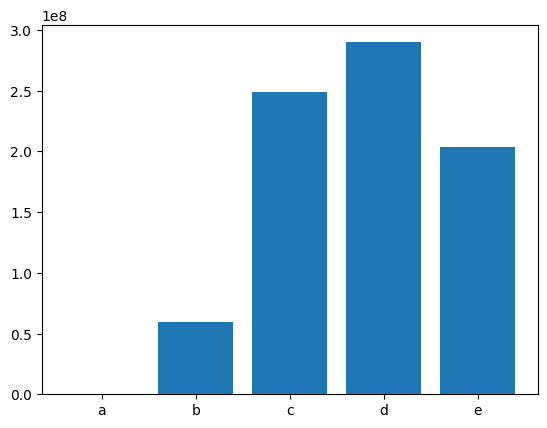

In [73]:
# Корректировка данных по MonthlyIncome

# print("average income -", data['MonthlyIncome'].mean())
# print("median income-", data['MonthlyIncome'].median())

# # Проверка нет ли какой-то зависимости
# data.groupby("GroupAge")["MonthlyIncome"].mean()
uniq_groupage = pd.unique(data['GroupAge']) # получаем уникальные значение возрастных групп
uniq_groupage.sort() # cортируем списка групп
groupage_income = data.groupby("GroupAge")["MonthlyIncome"].sum()

plt.bar(uniq_groupage,groupage_income)

In [77]:
# У каждой возрастной группы есть отсутсвующая информация по доходу.
data.loc[data['GroupAge'] == 'e']['MonthlyIncome'].isnull().value_counts()

False    31929
True     11001
Name: MonthlyIncome, dtype: int64

In [58]:
data.groupby("GroupAge")["MonthlyIncome"].median()

GroupAge
a    6000.0
b    3400.0
c    5800.0
d    6250.0
e    5009.0
Name: MonthlyIncome, dtype: float64

In [61]:
data.groupby("GroupAge")["MonthlyIncome"].mean()

GroupAge
a    6000.000000
b    4035.569239
c    6906.329869
d    7740.261944
e    6370.608068
Name: MonthlyIncome, dtype: float64

In [62]:
data["MonthlyIncome"].mean()

6670.221237392844

In [80]:
# В рамках каждой группы будет найдено значение медианного дохода и этим значеним будут заполнены пустые значения в группах.

# Нахождение медианного дохода для возрастной группы 'b'
med_income_group_b = data.loc[data['GroupAge'] == 'b']['MonthlyIncome'].median()
# Нахождение медианного дохода для возрастной группы 'c'
med_income_group_c = data.loc[data['GroupAge'] == 'c']['MonthlyIncome'].median()
# Нахождение медианного дохода для возрастной группы 'd'
med_income_group_d = data.loc[data['GroupAge'] == 'd']['MonthlyIncome'].median()
# Нахождение медианного дохода для возрастной группы 'e'
med_income_group_e = data.loc[data['GroupAge'] == 'e']['MonthlyIncome'].median()

print(med_income_group_b, med_income_group_c, med_income_group_d, med_income_group_e)

3400.0 5800.0 6250.0 5009.0


In [86]:
# Заполнение пропусков по ежемесячному доходу в рамках определенной возрастной группы.
data.loc[(data["GroupAge"] == "b") & (data["MonthlyIncome"].isnull()), 'MonthlyIncome'] = med_income_group_b
# data.loc[data['GroupAge'] == 'b'].isnull()['MonthlyIncome'].value_counts() # Проверка заполнения
data.loc[(data["GroupAge"] == "c") & (data["MonthlyIncome"].isnull()), 'MonthlyIncome'] = med_income_group_c
data.loc[(data["GroupAge"] == "d") & (data["MonthlyIncome"].isnull()), 'MonthlyIncome'] = med_income_group_d
data.loc[(data["GroupAge"] == "e") & (data["MonthlyIncome"].isnull()), 'MonthlyIncome'] = med_income_group_e

In [88]:
data.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
RealEstateLoansOrLines                  0
GroupAge                                0
dtype: int64

In [90]:
# Сохранение данных в csv файл.
data.to_csv("Credit_scoring_team5_E.csv", index=False)

# Исключение выбросов из выборки

In [ ]:
# В процессе